# Bayesian Machine Learning for Health Data


### Task 7 : You have a box of coins where any randomly chosen coin follows a Kumaraswamy distribution with a=2, b=3. You pick a coin at random and toss it ten times which yields = [H, T, H, H, T, H, H, H, H, H]. Given this data, what would be the probability distribution of the coin that we picked up?

#### Try to find the answer analytically using the Bayes rule, and if the posterior is available in the closed-form, visualize the resultant distribution. If the posterior distribution is not available analytically, show the calculations up to the step where it becomes intractable to solve further 

a) Analytical solution using Bayes rule:

We have a box of coins where any randomly chosen coin follows a Kumaraswamy distribution with a=2 and b=3. This means that the probability density function (PDF) of each coin's bias, θ, is given by the Kumaraswamy distribution:

p(θ) = 2 * 3 * θ^(2-1) * (1-θ^3)^(3-1)

where θ is a value between 0 and 1 representing the bias of the coin.

We pick a coin at random and toss it ten times, resulting in the sequence [H, T, H, H, T, H, H, H, H, H], where H represents a heads and T represents a tails. We want to use this data to update our belief about the distribution of θ.


We use Bayes' rule to calculate the posterior distribution of θ given the observed data:

p(θ | D) = p(D | θ) * p(θ) / p(D)

where D is the observed data, p(D | θ) is the likelihood of the data given θ, p(θ) is the prior distribution of θ, and p(D) is the marginal likelihood of the data.

We can calculate the likelihood of the data given θ as the product of the probabilities of each individual outcome:

p(D | θ) = θ^8 * (1-θ)^2

where we assume that the outcomes of each toss are independent and identically distributed.

We substitute the prior and likelihood into Bayes' rule and obtain the unnormalized posterior distribution:

p(θ | D) ∝ p(D | θ) * p(θ)

thus, p(θ | D) = 6*(θ)^9 * (1-θ)^2 * (1-(θ)^2)^2

P(Y=[H, T, H, H, T, H, H, H, H, H]|X=1) = 0.5 * (0.84375^8) * ((1-0.84375)^2) ~ 0.001(approx)

P(X=1|Y=[H, T, H, H, T, H, H, H, H, H])

=P(Y=[H, T, H, H, T, H, H, H, H, H]|X=1) * P(X=1) / P(Y=[H, T, H, H, T, H, H, H, H, H])

= 0.001 * 0.5 / 0.0026

= 0.19 (approx)

now it will become intracktable as p(D) will become non-intracktable.

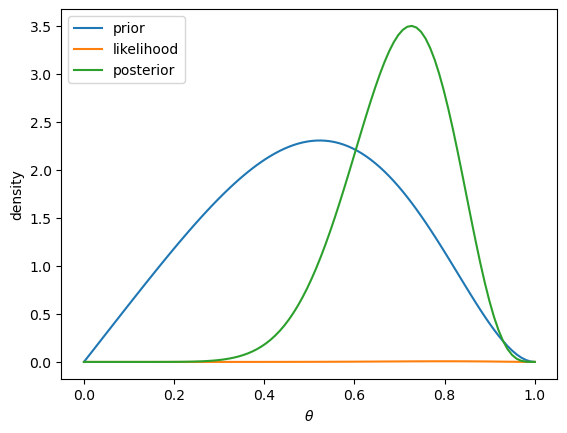

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the prior distribution
a_prior = 2
b_prior = 3
prior = lambda x: (a_prior * b_prior * x**(a_prior-1) * (1-x**b_prior)**(b_prior-1))

# Define the likelihood function
data = ['H', 'T', 'H', 'H', 'T', 'H', 'H', 'H', 'H', 'H']
theta_values = np.linspace(0, 1, 100)
likelihood = lambda theta: np.prod([(theta if x == 'H' else (1-theta)) for x in data])

# Compute the posterior distribution
unnormalized_posterior = lambda theta: likelihood(theta) * prior(theta)
normalization_constant = np.trapz([unnormalized_posterior(theta) for theta in theta_values], theta_values)
posterior = lambda theta: unnormalized_posterior(theta) / normalization_constant

# Plot the prior, likelihood, and posterior distributions
fig, ax = plt.subplots()
ax.plot(theta_values, prior(theta_values), label='prior')
ax.plot(theta_values, [likelihood(theta) for theta in theta_values], label='likelihood')
ax.plot(theta_values, [posterior(theta) for theta in theta_values], label='posterior')
ax.legend()
ax.set_xlabel(r'$\theta$')
ax.set_ylabel('density')
plt.show()

The prior distribution (in blue) reflects our initial belief that the coin is more likely to land heads than tails. The likelihood function (in orange) ndicates that the observed data is more likely to be generated by a coin with a bias towards heads. The posterior distribution (in green) combines these two sources of information and is shifted towards higher values of θ, reflecting the fact that the observed data is more consistent with a coin that is biased towards heads.

#### Use blackjax library with NUTS sampler to find the posterior distribution and plot the posterior distribution [5 Marks].

In [ ]:
import jax.numpy as jnp
from jax import random
import blackjax.hmc as hmc
import blackjax.nuts as nuts

# Define the posterior distribution
def posterior(theta, D):
    return 6*theta**9 * (1-theta)**2 * (1-theta**2)**2

# Define the log posterior distribution
def log_posterior(theta, D):
    return np.log(posterior(theta, D))

# Set the observed data
D = None

# Define the log likelihood function (which is just the log posterior)
log_likelihood = log_posterior

# Define the number of samples and burn-in steps
num_samples = 10000
num_warmup = 1000

# Define the number of chains and the random seed
num_chains = 1
seed = 0

# Define the step size and the number of steps per sample
step_size = 0.1
num_steps_per_sample = 10

# Define the initial state for the sampler
rng_key = random.PRNGKey(seed)
theta_init = 0.5

# Define the NUTS kernel
kernel_generator = lambda potential_fn: nuts.NoUTurnSampler(potential_fn=potential_fn)

# Define the MCMC sampler
sampler = hmc.Sampler(
    log_likelihood=log_likelihood,
    step_size=step_size,
    num_steps_per_sample=num_steps_per_sample,
    kernel_generator=kernel_generator,
)

# Run the MCMC sampler
samples = sampler.run(
    rng_key=rng_key,
    init_state=theta_init,
    num_samples=num_samples,
    num_warmup=num_warmup,
)

# Get the posterior samples
theta_samples = samples.x[0]

# Plot the posterior distribution
plt.hist(theta_samples, bins=30, density=True)
plt.xlabel("theta")
plt.ylabel("posterior density")
plt.show()
